# investment estimator (investimator)

In [1]:
import matplotlib.pyplot as plt
import copy
import numpy as np

In [2]:
# predict performance over time
years = 10
time = np.arange(1, years + 1, 1) # time in years
year = np.arange(2024, years + 2025, 1)


# my accounts and their annual contributions
start_amount = {"TFSA":6000,
                "RRSP1":13365,
                "RRSP2":12187,
                "FHSA":16310
               }

contribution = {"TFSA":3000,
                "RRSP1":1500,
                "RRSP2":1500,
                "FHSA":0
               }

In [3]:
# ETFs, their respective 10 yr returns, a guess at the standard deviation, and the dividends they pay out
# interest (%/year), std dev (%/year), dividend ($/year)
vfv = 15.2, 10.0, 0 # s&p500
voo = 13.3, 9.0, 0 # s&p500
vug = 15.6, 5.0, 0 # us growth
vsb = 2.0, 3.0, 0 # canadian bonds (expecting higher returns as interest rate drops)
xeqt = 11.9, 5.0, 0 # buy the whole world, Aaron reco (5 yr)
veqt = 11.8, 7.0, 0 # broad exposure, Aaron reco (5 yr)
qqqq = 10.0, 10.0, 0 # nasdaq
vdy = 8.6, 3.0, 0 # canadian bonds
vab = 2.1, 1.0, 0 # canadian bonds, mixed
savings = 4.0, 1.0, 0 # fixed interest savings account

In [4]:
# which investment goes where
investment = {"TFSA":vdy,
              "RRSP1":vfv,
              "RRSP2":veqt,
              "FHSA":savings
             }

Compound interest looks like:

$$
a = p(1 + \frac{r}{n})^{nt}
$$

where

$a$ = amount\
$p$ = principle\
$r$ = decimal interest rate\
$n$ = compounding periods per year\
$t$ = time in years

In [5]:
# build out a simulation through time
# buy ETFS annually in each account, calculate the monthly compounded interest
n = 12 # compound monthly

# initailize arrays to hold all the accounts
accounts = {"TFSA":[start_amount["TFSA"]] + [0] * years,
            "RRSP1":[start_amount["RRSP1"]] + [0] * years,
            "RRSP2":[start_amount["RRSP2"]] + [0] * years,
            "FHSA":[start_amount["FHSA"]] + [0] * years,
           }

# error estimate arrays
low_est = copy.deepcopy(accounts) # worst case scenario
high_est = copy.deepcopy(accounts) # best case scenario

In [6]:
total = [sum(start_amount.values())] + [0] * years

# run the simulation
for t in time:
    for key in accounts.keys():
        accounts[key][t] = accounts[key][t-1] * (1 + investment[key][0] * 0.01 / n) ** n + investment[key][2] + contribution[key]
        low_est[key][t] = low_est[key][t-1] * (1 + (investment[key][0] - investment[key][1]) * 0.01 / n) ** n + investment[key][2] + contribution[key]
        high_est[key][t] = high_est[key][t-1] * (1 + (investment[key][0] + investment[key][1]) * 0.01 / n) ** n + investment[key][2] + contribution[key]
        total[t] += accounts[key][t]

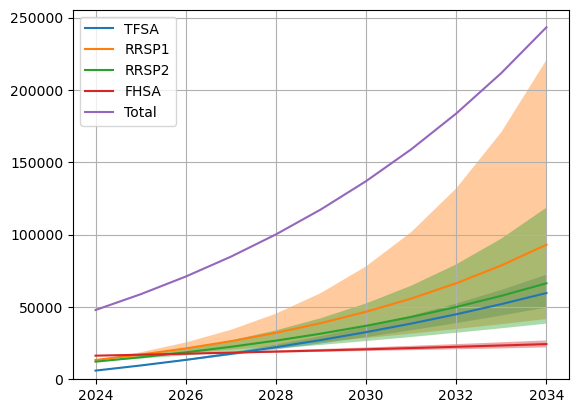

In [7]:
# plot our findings
fig, ax = plt.subplots()
for key in accounts.keys():
    ax.plot(year, accounts[key], label=key)
    ax.fill_between(year, low_est[key], high_est[key], alpha=0.4)
ax.plot(year, total, label="Total")
ax.legend()
ax.set_ylim(0, 1.05 * np.max(total))
ax.grid()